# B-Lab Notebook
This Jupyter notebook shows the application of the B-Lab classes and their functions. The usage of those functions is explained below, with examples and additional information.

First, as usual, we need to import our libraries:

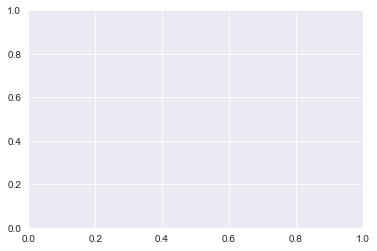

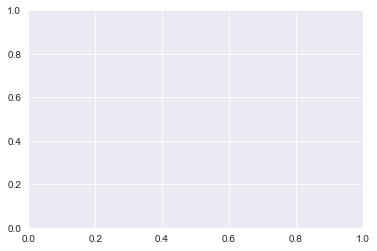

In [1]:
from src import devices as blab  # <- crucial import for using the B-Lab functions
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

## ID5
The ID5 spectrometer is one of the laboratory equipment in our research group `B-Lab`. In the following, there are nessessary functions for reading and analyzing ID5-files, calculating important values and visualizing results.\
All functions have a description, in case some input variables seem unclear. Also please notice the output prints of functions! Some functions have valuable information or error messages!

### <u>Reading the files</u>

ID5-files must be saved by the user in TXT- and utf-8 format.

FRET measurements use emission and excitation wavelengths. These are not completely or incorrectly exported when writing the ID5-files. Therefore you will need to write the wavelengths into a dictionary, as shown below:

In [2]:
wavelength_pairs = {
    "Dem_Dex": [530, 595],
    "Aem_Dex": [530, 660],
    "Aem_Aex": [630, 660]}

To use these values in the FRET calculations, they need to be passed to the ID5 function in a dictionary.
The function `ID5` is much more than just the function to read the files - but this is not relevant now. You need to know the following:
- The function requires the name of the file you would like to read and the aforementioned wavelength pairs variable as such: 
`blab.ID5(filepath, wavelength pairs variable)`

If the file has been successfully loaded, the measurements will be displayed. They are named with "Measurement_" and a consecutive number. The usage and output is shown below:


In [3]:
working_with_id5_data = blab.ID5("src/id5_data/2023-05-30_MgCl2_titration_VS.txt", wavelength_pairs)

Measurement_1 = FRET_21°C: Endpoint, Fluorescence
Measurement_2 = FRET_23°C: Endpoint, Fluorescence
Measurement_3 = FRET_25°C: Endpoint, Fluorescence
Measurement_4 = FRET_27°C: Endpoint, Fluorescence
Measurement_5 = FRET_29°C: Endpoint, Fluorescence
Measurement_6 = FRET_31°C: Endpoint, Fluorescence
Measurement_7 = FRET_33°C: Endpoint, Fluorescence
Measurement_8 = FRET_35°C: Endpoint, Fluorescence
Measurement_9 = FRET_37°C: Endpoint, Fluorescence
Measurement_10 = FRET_39°C: Endpoint, Fluorescence
Measurement_11 = FRET_41°C: Endpoint, Fluorescence
Measurement_12 = FRET_43°C: Endpoint, Fluorescence
Measurement_13 = FRET_45°C: Endpoint, Fluorescence
Measurement_14 = FRET_47°C: Endpoint, Fluorescence
Measurement_15 = FRET_49°C: Endpoint, Fluorescence
Measurement_16 = FRET_51°C: Endpoint, Fluorescence
Measurement_17 = FRET_53°C: Endpoint, Fluorescence
Measurement_18 = FRET_55°C: Endpoint, Fluorescence
Measurement_19 = FRET_57°C: Endpoint, Fluorescence
Measurement_20 = FRET_59°C: Endpoint, Fl

Summary: <u> what you need to write into your Jupyter Notebook first </u>:

1. `from src import devices as blab`
2. the correct wavelength pairs as shown above, saved in a variable
3. `blab.ID5(filepath, wavelength pairs variable)` saved in a variable



### <u>Accessing specific measurements</u>

The measurements are kept in the attribute "measurements" of the variable "working_with_id5_data".
This is simply a dictionary that contains all measurements.

In [4]:
print(working_with_id5_data.measurements["Measurement_1"])

When accessing Measurement 1, the result appears unusual. This is due to the fact that the measurements are saved as objects.
Objects are, in a nutshell, complex variables. They have attributes such as the measurement name or the data in a dataframe. Furthermore, the objects include functions that can be used to improve data interaction.
You can store the measurement in a new variable and examine the name of the measurement and the data in it. The informations are stored in the "section_name" and "working_df" attribute.

Consider the following:

In [5]:
measure_1 = working_with_id5_data.measurements["Measurement_1"]

print(f"Name of the Measurement = {measure_1.section_name}")

df_of_measurement_1 = measure_1.working_df
df_of_measurement_1

# alternative: 
# df_of_measurement_1 = working_with_id5_data.measurements["Measurement_1"].working_df

Name of the Measurement = FRET_21°C


,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU
0,530,595,21,A1,4220
1,530,595,21,A2,865316
2,530,595,21,A3,392148
3,530,595,21,A4,1262228
4,530,595,21,A5,781926
...,...,...,...,...,...
211,630,660,21,H5,6967
212,630,660,21,H6,5286630
213,630,660,21,H7,6248
214,630,660,21,H8,3133936


### <u>Accessing specific wells</u>

With the function `get_well()`, you can choose the well, you would like to work on and save it as a dataframe. It is a function of the objects, so that you only need to specify which wellnumber, you would like to access. 

Because this is a standard pandas DataFrame, the function `get_well()` does not exist in the dataframe "df_of_measurement_1". To access `get_well()`, you have to use the object named "measure_1".

In [6]:
df_A3 = measure_1.get_well("A3")
df_A3

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU
2,530,595,21,A3,392148
74,530,660,21,A3,881633
146,630,660,21,A3,2735696


If the wellnumber does not exist or you made a typo, the function will print an error message:

In [7]:
df_nonexistant = measure_1.get_well("A13")

ERROR: Wellnumber does not exist.
Accessible wellnumbers: ['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'B1' 'B2' 'B3' 'B4' 'B5'
 'B6' 'B7' 'B8' 'B9' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'D1'
 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6'
 'E7' 'E8' 'E9' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'G1' 'G2'
 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7'
 'H8' 'H9']


### <u> The way to calculate FRET </u>

In the next code blocks is a "pipeline" described for calculations leading up to and including FRET-calculations. At first, the wavelength pairs are needed and the path to the file.

In [8]:
wavelength_pairs = {
        "Dem_Dex": [530, 595],
        "Aem_Dex": [530, 660],
        "Aem_Aex": [630, 660]
}

my_id5_data = blab.ID5("src/id5_data/2023-05-30_MgCl2_titration_VS.txt", wavelength_pairs)

Measurement_1 = FRET_21°C: Endpoint, Fluorescence
Measurement_2 = FRET_23°C: Endpoint, Fluorescence
Measurement_3 = FRET_25°C: Endpoint, Fluorescence
Measurement_4 = FRET_27°C: Endpoint, Fluorescence
Measurement_5 = FRET_29°C: Endpoint, Fluorescence
Measurement_6 = FRET_31°C: Endpoint, Fluorescence
Measurement_7 = FRET_33°C: Endpoint, Fluorescence
Measurement_8 = FRET_35°C: Endpoint, Fluorescence
Measurement_9 = FRET_37°C: Endpoint, Fluorescence
Measurement_10 = FRET_39°C: Endpoint, Fluorescence
Measurement_11 = FRET_41°C: Endpoint, Fluorescence
Measurement_12 = FRET_43°C: Endpoint, Fluorescence
Measurement_13 = FRET_45°C: Endpoint, Fluorescence
Measurement_14 = FRET_47°C: Endpoint, Fluorescence
Measurement_15 = FRET_49°C: Endpoint, Fluorescence
Measurement_16 = FRET_51°C: Endpoint, Fluorescence
Measurement_17 = FRET_53°C: Endpoint, Fluorescence
Measurement_18 = FRET_55°C: Endpoint, Fluorescence
Measurement_19 = FRET_57°C: Endpoint, Fluorescence
Measurement_20 = FRET_59°C: Endpoint, Fl

### <u>Calculating background corrected values</u>

The function for removing blanks must know two things in order to complete the blank correction :

1. Which of the measurements contain blanks?
2. Which wells were these blanks measured in?

It will then go through all of the measurements, collecting values from the chosen wells and computing a mean blank.
The values in the "working_df" of the specified measurements are then background corrected.

To achieve this, the lines of the code below are absolutely necessary. First, an empty list is created, the names of the measurements extracted and then looped over those, to only get the necessary ones (in this case, those measurements which have the word "FRET" in the section name).

In [9]:
# creating a list of measurement names
FRET_measurements = []
measure_names = my_id5_data.measurements.keys()
for name in measure_names:
    measurement = my_id5_data.measurements[name]
    name_1 = measurement.section_name
    if "FRET" in name_1:
        FRET_measurements.append(name)
print(FRET_measurements)

['Measurement_1', 'Measurement_2', 'Measurement_3', 'Measurement_4', 'Measurement_5', 'Measurement_6', 'Measurement_7', 'Measurement_8', 'Measurement_9', 'Measurement_10', 'Measurement_11', 'Measurement_12', 'Measurement_13', 'Measurement_14', 'Measurement_15', 'Measurement_16', 'Measurement_17', 'Measurement_18', 'Measurement_19', 'Measurement_20', 'Measurement_21', 'Measurement_22', 'Measurement_23']


Next, you need to define, which wellnumbers contain the blanks. This is best given as a list.

You can then use the function `calculate_blank()` in which you need to specify the specific measurements and blank wellnumbers. As you already have lists of both, you put them as parameter into the function, as seen below. 

Summary: \
This function requires two parameters (in this order):
1. the (FRET) measurement list `FRET_measurements`
2. the wellnumber list of the blank wells `blank_wells`


In [10]:
# creating a list of wells with blank samples
blank_wells = ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1"]

# calculating the mean blank and correct the values
mean_blank = my_id5_data.calculate_blank(FRET_measurements, blank_wells)
print(f"Mean value of all blank wellnumbers: {mean_blank}")

Mean value of all blank wellnumbers: 3512.998188405797


In each defined measurement, the working_df is also modified.  A new column called `bg_corrected_RFU` has been added.

In [11]:
my_id5_data.measurements["Measurement_1"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg corrected RFU
0,530,595,31,A1,4260,7.470018e+02
1,530,595,31,A2,850387,8.468740e+05
2,530,595,31,A3,377165,3.736520e+05
3,530,595,31,A4,1191292,1.187779e+06
4,530,595,31,A5,681511,6.779980e+05
...,...,...,...,...,...,...
211,630,660,31,H5,6705,3.192002e+03
212,630,660,31,H6,4760308,4.756795e+06
213,630,660,31,H7,4560,1.047002e+03
214,630,660,31,H8,2923471,2.919958e+06


### <u> Insert new data into a new column </u>

Each measurement has its own function here as well. The `add_new_column()` function can be used with a dictionary to assign a new value to an already existing value in the dataFrame. For example, in all rows where the column "wellnumber" contains the value "A1" assign the value 10 to a new column "concentration" :

In [12]:
# Information about concentration of ions in nM
concentrations = {"A2":0,"B2":1,"C2":2.5,"D2":5, "E2":7.5,"F2":10, "G2":12.5,"H2":25,
            "A3":50,"B3":75,"C3":100,"D3":500,
            "A4":0,"B4":1,"C4":2.5,"D4":5,"E4":7.5,"F4":10, "G4":12.5, "H4":25,
            "A5":50,"B5":75,"C5":100,"D5":500,
            "A6":0,"B6":1, "C6":2.5,"D6":5,"E6":7.5,"F6":10,"G6":12.5,"H6":25,
            "A7":50,"B7":75,"C7":100, "D7":500,
            "A8":0,"B8":1,"C8":2.5, "D8":5, "E8":7.5,"F8":10,"G8":12.5,"H8":25,
            "A9":50,"B9":75,"C9":100,"D9":500
}

# Do it for 1 Measurement:
my_id5_data.measurements["Measurement_1"].add_new_column("wellnumber", concentrations, "concentration (mM)")
my_id5_data.measurements["Measurement_1"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg corrected RFU,concentration (mM)
0,530,595,21,A1,4220,7.070018e+02,NaN
1,530,595,21,A2,865316,8.618030e+05,0.0
2,530,595,21,A3,392148,3.886350e+05,50.0
3,530,595,21,A4,1262228,1.258715e+06,0.0
4,530,595,21,A5,781926,7.784130e+05,50.0
...,...,...,...,...,...,...,...
211,630,660,21,H5,6967,3.454002e+03,NaN
212,630,660,21,H6,5286630,5.283117e+06,25.0
213,630,660,21,H7,6248,2.735002e+03,NaN
214,630,660,21,H8,3133936,3.130423e+06,25.0


You can also do this step for all of your measurements. In the following code cell, thi sis done for all measurements containing the word "FRET". 

In [13]:
# Do it for all FRET Measurements
for measurement_name, measurement in my_id5_data.measurements.items():
    if "FRET" in measurement.section_name:
        measurement.add_new_column("wellnumber", concentrations, "concentration (mM)")
# Example print
my_id5_data.measurements["Measurement_7"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg corrected RFU,concentration (mM)
0,530,595,33,A1,4679,1.166002e+03,NaN
1,530,595,33,A2,826432,8.229190e+05,0.0
2,530,595,33,A3,375519,3.720060e+05,50.0
3,530,595,33,A4,1152152,1.148639e+06,0.0
4,530,595,33,A5,661476,6.579630e+05,50.0
...,...,...,...,...,...,...,...
211,630,660,33,H5,4751,1.238002e+03,NaN
212,630,660,33,H6,4778717,4.775204e+06,25.0
213,630,660,33,H7,5375,1.862002e+03,NaN
214,630,660,33,H8,2935441,2.931928e+06,25.0


### <u> Calculating FRET </u>

Now, the dataframe "working_df" needs to be restructured, so that the intensities of acceptor excitation or emission and of donor excitation or emission are better to grasp for the user. The function `restructure_working_df()` construct a new dataframe called `FRET_df`. Please note, that this dataframe *does not* contain the calculated FRET values *yet*. 

The function `restructure_working_df()` needs:
- list of all FRET measurements, e.g. `FRET_measurements`
- the variable of the wavelength pairs e.g. `wavelength_pairs`

In [15]:
my_id5_data_restructured = my_id5_data.restructure_working_df(FRET_measurements, wavelength_pairs)
m1 = my_id5_data.measurements["Measurement_1"].FRET_df
m1

,temperature (°C),wellnumber,concentration (mM),I^Dem_Dex,I^Aem_Dex,I^Aem_Aex
0,21,A1,NaN,7.070018e+02,-2.290998e+03,3.452002e+03
1,21,A2,0.0,8.618030e+05,8.117650e+05,4.384354e+06
2,21,A3,50.0,3.886350e+05,8.781200e+05,2.732183e+06
3,21,A4,0.0,1.258715e+06,1.136348e+06,6.049143e+06
4,21,A5,50.0,7.784130e+05,1.223314e+06,4.022249e+06
...,...,...,...,...,...,...
67,21,H5,NaN,2.620018e+02,-1.664998e+03,3.454002e+03
68,21,H6,25.0,5.314850e+05,1.671132e+06,5.283117e+06
69,21,H7,NaN,1.141002e+03,-1.844998e+03,2.735002e+03
70,21,H8,25.0,5.893190e+05,1.398826e+06,3.130423e+06


To successfully calculate the FRET values, one needs to calculate the bleedthrough and direct excitation corrections. This is done with the functions `calculate_bt_correction()` and `calculate_de_correction()`. They both need: 
- list of all FRET measurements, e.g. `FRET_measurements`
- bleedthrough or direct excitation variable, that is defined beforehand, e.g. `bt_var = 0.1314`

In [16]:
pd.options.mode.chained_assignment = None
bt_d = 0.1314
my_id5_data_bt_corr = my_id5_data.calculate_bt_correction(FRET_measurements, bt_d)
my_id5_data.measurements["Measurement_1"].FRET_df.head()

,temperature (°C),wellnumber,concentration (mM),I^Dem_Dex,I^Aem_Dex,I'^Aem_Dex,I^Aem_Aex
1,21,A2,0.0,8.618030e+05,8.117650e+05,6.985241e+05,4.384354e+06
2,21,A3,50.0,3.886350e+05,8.781200e+05,8.270534e+05,2.732183e+06
3,21,A4,0.0,1.258715e+06,1.136348e+06,9.709529e+05,6.049143e+06
4,21,A5,50.0,7.784130e+05,1.223314e+06,1.121031e+06,4.022249e+06
5,21,A6,0.0,1.712445e+06,9.591280e+05,7.341127e+05,7.756627e+06


A new column `I'^Aem_Dex` has been added after the column `I^Aem_Dex`.

If the bleedthrough value is equal to zero, the function will print some information regarding the dataframe:

In [17]:
pd.options.mode.chained_assignment = None
bt_a = 0
my_id5_data_bt_corr = my_id5_data.calculate_bt_correction(FRET_measurements, bt_a)
my_id5_data.measurements["Measurement_1"].FRET_df.head()

Bleedthrough variable is equal to 0.
Therefore I'^Dem_Dex is equal to I^Dem_Dex. No I'^Dem_Dex column will be added.


,temperature (°C),wellnumber,concentration (mM),I^Dem_Dex,I^Aem_Dex,I'^Aem_Dex,I^Aem_Aex
1,21,A2,0.0,8.618030e+05,8.117650e+05,6.985241e+05,4.384354e+06
2,21,A3,50.0,3.886350e+05,8.781200e+05,8.270534e+05,2.732183e+06
3,21,A4,0.0,1.258715e+06,1.136348e+06,9.709529e+05,6.049143e+06
4,21,A5,50.0,7.784130e+05,1.223314e+06,1.121031e+06,4.022249e+06
5,21,A6,0.0,1.712445e+06,9.591280e+05,7.341127e+05,7.756627e+06


The `calculate_de_correction()` function has a similar functionality. In the code block below is an example with the printed information.

In [18]:
de_a = 0.0215
my_id5_data_bt_corr = my_id5_data.calculate_de_correction(FRET_measurements, de_a)
my_id5_data.measurements["Measurement_1"].FRET_df.head()

I''^Dem_Dex equals I^Dem_Dex as I^Dem_Aex cannot physically and technically be measured.
No I''^Dem_Dex column will be added to the FRET dataframe. Please use I^Dem_Dex.
I''^Aem_Dex has been added to the FRET dataframe.


,temperature (°C),wellnumber,concentration (mM),I^Dem_Dex,I^Aem_Dex,I'^Aem_Dex,I''^Aem_Dex,I^Aem_Aex
1,21,A2,0.0,8.618030e+05,8.117650e+05,6.985241e+05,6.042605e+05,4.384354e+06
2,21,A3,50.0,3.886350e+05,8.781200e+05,8.270534e+05,7.683114e+05,2.732183e+06
3,21,A4,0.0,1.258715e+06,1.136348e+06,9.709529e+05,8.408963e+05,6.049143e+06
4,21,A5,50.0,7.784130e+05,1.223314e+06,1.121031e+06,1.034552e+06,4.022249e+06
5,21,A6,0.0,1.712445e+06,9.591280e+05,7.341127e+05,5.673452e+05,7.756627e+06


Now, the FRET values can be calculated. Please consider that the list of measurements from which FRET is to be calculated is needed and that the FRET values are added as a new column to the FRET dataframe. 

Parameter needed:
- list of all FRET measurements, e.g. `FRET_measurements`

In [19]:
fret_calcs = my_id5_data.calculate_FRET(FRET_measurements)
m1_fret_values = my_id5_data.measurements["Measurement_1"].FRET_df
m1_fret_values.head()

,temperature (°C),wellnumber,concentration (mM),I^Dem_Dex,I^Aem_Dex,I'^Aem_Dex,I''^Aem_Dex,I^Aem_Aex,FRET
1,29,A2,0.0,8.576310e+05,7.378110e+05,6.251183e+05,5.347467e+05,4.203331e+06,0.384053
2,29,A3,50.0,3.804210e+05,8.307670e+05,7.807797e+05,7.276274e+05,2.472200e+06,0.656675
3,29,A4,0.0,1.226256e+06,1.018091e+06,8.569610e+05,7.356983e+05,5.640125e+06,0.374982
4,29,A5,50.0,7.164620e+05,1.191955e+06,1.097812e+06,1.014015e+06,3.897528e+06,0.585974
5,29,A6,0.0,1.661152e+06,8.370460e+05,6.187706e+05,4.605590e+05,7.358679e+06,0.217070


### Correction Matrices

The correction matrix is needed for calculating bleedthrough and direct Excitation. Therefore it needs to be generated beforehand from the measurements of Cy3 and Cy5.

The function requires the following parameters:
1. under measurement_cy3: the specific Cy3 measurement for the correction matrix
2. under measurement_cy5: the specific Cy5 measurement for the correction matrix
3. under wellnumber: number of the well as a string (eg. "A2")


In [20]:
wavelength_pairs = {
        "Dex_Dem": [530, 595],
        "Dex_Aem": [530, 660],
        "Aex_Aem": [630, 660]}

id5_data_cm = blab.ID5("src/id5_data/2023-03-15_Praktikum_FRET3_VS.txt", wavelength_pairs)

Measurement_1 = Korrekturmatrix Flur: Endpoint, Fluorescence
Measurement_2 = Korr.Mat. Cy3: Endpoint, Fluorescence
Measurement_3 = Korr.Mat. Cy5: Endpoint, Fluorescence
Measurement_4 = EmCy3: Spectrum, Fluorescence
Measurement_5 = EmCy5: Spectrum, Fluorescence
Measurement_6 = 20°C: Endpoint, Fluorescence
Measurement_7 = FRET 20 °C: Endpoint, Fluorescence
Measurement_8 = 25°C: Endpoint, Fluorescence
Measurement_9 = FRET 25 °C: Endpoint, Fluorescence
Measurement_10 = 30 °C: Endpoint, Fluorescence
Measurement_11 = FRET 30 °C: Endpoint, Fluorescence
Measurement_12 = 35°C: Endpoint, Fluorescence
Measurement_13 = FRET 35 °C: Endpoint, Fluorescence
Measurement_14 = 40°C: Endpoint, Fluorescence
Measurement_15 = FRET 40 °C: Endpoint, Fluorescence
Measurement_16 = 43°C: Endpoint, Fluorescence
Measurement_17 = FRET 43°C: Endpoint, Fluorescence
Measurement_18 = 45°C: Endpoint, Fluorescence
Measurement_19 = FRET 45 °C: Endpoint, Fluorescence
Measurement_20 = 47°C: Endpoint, Fluorescence
Measurement

In [21]:
id5_data_cm.measurements["Measurement_2"].working_df["wellnumber"].unique()

array(['A5', 'A6', 'B5', 'B6'], dtype=object)

In [22]:
cm_cy3 = id5_data_cm.calculate_correction_matrix(measurement_cy3="Measurement_2", measurement_cy5="Measurement_3", wellnumber="A5")
cm_cy3

AttributeError: 'ID5' object has no attribute 'calculate_correction_matrix'

In [24]:
cm_cy5 = id5_data_cm.calculate_correction_matrix("Measurement_2", "Measurement_3", "B5")
cm_cy5

AttributeError: 'ID5' object has no attribute 'calculate_correction_matrix'

### <u>Calculating bleedthrough and direct excitation</u>

The function `calculate_bleedthrough()` is used to calculate the bleedthrough, either of the donor or the acceptor, whereas the function `calculate_directExcitation()` is used to calculate the direct excitation of either donor or acceptor. 

The functions require: 
1. the correction matrix
2. the donor ("D") or acceptor ("A") type

In [25]:
bt_d = id5_data_cm.calculate_bleedthrough(cm_cy3, "D")
bt_a = id5_data_cm.calculate_bleedthrough(cm_cy5, "A")

de_d = id5_data_cm.calculate_directExcitation(cm_cy3, "D")
de_a = id5_data_cm.calculate_directExcitation(cm_cy5, "A")

AttributeError: 'ID5' object has no attribute 'calculate_bleedthrough'

As you can see, these functions print out some information concerning the calculations. It can happen, that values in the correction matrix are zero. In this case, the bleedthrough or direct excitation are set to 0.

### <u> Calculations</u>

The calculated corrections for bleedtrough, direct excitation and FRET were taken from
 
    Börner R, Kowerko D, Hadzic MCAS, König SLB, Ritter M, et al. (2018)
    Simulations of camera-based single-molecule fluorescence experiments. PLOS ONE 13(4): e0195277.
    https://doi.org/10.1371/journal.pone.0195277

## Carry

The Cary 3500 is one of the laboratory equipment in our research group `B-Lab`. In the following, there are necessary functions for reading Cary-files, so that further analyses on the data can be accomplished.\
Also please notice the output prints of functions! Some functions have valuable information or error messages!

### <u>Reading the files</u>

Cary files must be saved by the user in csv- and utf-8 format.
The Carry device has two different output file formats: one with additional data (for absorption measurements) and one without (for meltcurve measurements). This additional data, the meta data, is only present in "CSV Reports".

First, you must define the names of your construct samples, as seen in the code block below. Therefore, the function for reading Carry-files with meta data requires
- the file path & the variable name to your list of samples e.g. `blab.carry("filename_or_filepath", samples_variable)`

In [ ]:
cary = Cary(file_path="path/to/your/data") # Mirko variant for Paul
# accessing data in tidy format with cary.data
# accessing hyperparameters with cary.hyperparameters

In [26]:
sam_names = ['KL 1.1', 'KL 1.2', 'TL 2.1', 'TL 2.2']
carry_with_meta = blab.Carry(file_path="src/carry_data/2023-02-14_UV-VIS_RNA_KL-TL_VS.csv", sample_names=sam_names)

﻿CSV Report,2023-02-14_UV-VIS_RNA_VS.csv

Carrydata with meta
﻿CSV Report,2023-02-14_UV-VIS_RNA_VS.csv


To access the data dictionary (measurements and meta data), use the following keys:
Metadata_Method_1
Metadata_Samples_1
Measurement_1



To access the meta data and/or the dataframe itself, see the following code:

In [27]:
methods = carry_with_meta.measurements["Metadata_Method_1"]
methods

{'X mode': ['nm'],
 'Y mode': ['Abs'],
 'Collect mode': ['Scan'],
 'Scan range start (nm)': ['800.00'],
 'Scan range stop (nm)': ['200.00'],
 'Data Interval (nm)': ['1.00'],
 'Scan rate (nm/min)': ['3000'],
 'Averaging Time (s)': ['.02'],
 'Spectral Bandwidth (nm)': ['2'],
 'Detector module': ['Multicell Peltier UV-Vis'],
 'Baseline': ['Off'],
 'Experiment Zones': ['1']}

In [28]:
samples = carry_with_meta.measurements["Metadata_Samples_1"]
samples

{'Collection Time': ['2023-02-14 13:00:11 (+01:00)',
  '2023-02-14 13:00:11 (+01:00)',
  '2023-02-14 13:00:11 (+01:00)',
  '2023-02-14 13:00:11 (+01:00)'],
 'Cell Number': ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4'],
 'Module Serial Number': ['MY2226ZC01',
  'MY2226ZC01',
  'MY2226ZC01',
  'MY2226ZC01'],
 'Temperatures (°C)': [],
 'Instrument Serial Number': ['MY2228ZA03',
  'MY2228ZA03',
  'MY2228ZA03',
  'MY2228ZA03'],
 'Instrument Name': ['MY2228ZA03', 'MY2228ZA03', 'MY2228ZA03', 'MY2228ZA03']}

In [29]:
data = carry_with_meta.measurements["Measurement_1"]
data

,wavelength (nm),sample,value (RFU)
0,800.0,KL 1.1,0.013986
1,799.0,KL 1.1,0.01385
2,798.0,KL 1.1,0.013571
3,797.0,KL 1.1,0.013569
4,796.0,KL 1.1,0.013859
...,...,...,...
2399,204.0,TL 2.2,0.050071
2400,203.0,TL 2.2,0.046524
2401,202.0,TL 2.2,0.042315
2402,201.0,TL 2.2,0.037324


If you have a file without the meta data, the access to the data ist a bit different. First of all, you don't need an extra list with construct sample names. A filepath is nevertheless required.

In [ ]:
carry_without_meta = blab.Carry(file_path="src/carry_data/Export Data 2023_03_31_DNA_verdunnt_Schmelzkurve_PL.csv")

Access the dataframe itself:

In [ ]:
carry_without_meta.data

Either way, the dataframes are in tidy data format for easy accessibility and quick visualisations. With those dataframes, one can continue as pleased.  

## Genesis

The Genesis 50 is one of the laboratory equipement in our research group `B-Lab`. In the following, there are nessessary functions for reading Genesis-files, so that further analyses on the data can be accomplished.\\
Also please notice the output prints of functions! Some functions have valuable information or error messages!

### <u>Reading the files</u>

Carry-files must be saved by the user in csv- and utf-8 format.

In [ ]:
genesis_data = blab.Genesis(file_path="src/genesis_data/Scan_3_15_2023_1_21_01_PM.csv")


After reading the files, the function prints out an overview of all measurements in the file. The Measurements are named after the users input while operating the Genesis device.\
To access the individual measurements, use the following code:

In [ ]:
my_gen_data_m1 = genesis_data.measurements["Measurement_F_1_uM"]
my_gen_data_m1

If there are multiple scans of one concentration, the mean values are automatically added to the end dataframes. Furthermore, a measurement (dataframe) with all mean values to each concentration is generated:

In [ ]:
my_gen_data_means = genesis_data.measurements["Means_all"]
my_gen_data_means

As you can see, it already is in tidy data format and can now be used for visualizations. 

In [ ]:
sampl_num = len(my_gen_data_means['measurement'].unique())
print(my_gen_data_means['measurement'].unique())

fig, ax = plt.subplots(figsize=(12, 10))
colormap = plt.get_cmap('jet', sampl_num)
i = 0
for name, group in my_gen_data_means.groupby('measurement'):
        ax.plot(group['wavelength (nm)'], group['mean Abs'], c = colormap(i), label = name, marker='x', linewidth=0.5)
        i += 1

ax.set_xlabel(r'Wavelength $\lambda$ (nm)')
ax.set_ylabel('Absorbance (OD)')
plt.legend(loc='best')
plt.show()

## Nanodrop

The Nanodrop is another of the laboratory equipement in our research group `B-Lab`. In the following, there are nessessary functions for reading and visualizing Genesis-files, so that further analyses on the data can be accomplished.\\
Also please notice the output prints of functions! Some functions have valuable information or error messages!

### <u>Reading the files</u>

Nanodrop-files must be saved by the user in tsv- and utf-8 format.

In [ ]:
data_nano = blab.Nanodrop(file_path="src/nanodrop_data/RNA_BK_12_06_23_E2.tsv")
whole_nano = data_nano.working_df
whole_nano

The file contains the measurements of four different samples, with wavelengths, the absorbance values and the date & time. To get information about the possible samples, you can use the function `print_samples()`.

In [ ]:
data_nano.print_samples()

To access only the data of one sample, you can use the `get_sample()` function:

In [ ]:
sample1 = data_nano.get_sample("Sample 1")
sample1

The Nanodrop-Class is (until now) the only one, which has a function to plot the data. With `plot_sample()`, the data of one sample can be plotted. 
- The function requires the name of the sample you would like to visualize and a color as such: 
`data_nano.plot_sample("sample_name", color = "blue")`

In [ ]:
plot_1 = data_nano.plot_sample("Sample 1", color="blue")
plot_2 = data_nano.plot_sample("Sample 2", color="cyan")
plot_3 = data_nano.plot_sample("Sample 3", color="gold")
plot_4 = data_nano.plot_sample("Sample 4", color="firebrick")

To plot all samples in one plot, you can use the function `plot_all_samples()`:

In [ ]:
plot_all = data_nano.plot_all_samples()

Saving the visualizations can be achieved with the following line of code. It requires a filename (e.g. "`nano_plot.png`") and a resolution of 300 dpi. 

In [ ]:
# save figure
plot_all.savefig("nano_plot.png", dpi=300, bbox_inches = 'tight')